<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Analisis_Kualitas_Sperma_%26_Kesehatan_Reproduksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: Fertility
X shape: (100, 9) | y shape: (100, 1)


,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


,diagnosis
0,N
1,O
2,N
3,N
4,O



Missing per kolom:


,missing
season,0
age,0
child_diseases,0
accident,0
surgical_intervention,0
high_fevers,0
alcohol,0
smoking,0
hrs_sitting,0



Tipe data fitur:


,dtype
season,float64
age,float64
child_diseases,int64
accident,int64
surgical_intervention,int64
high_fevers,int64
alcohol,float64
smoking,int64
hrs_sitting,float64



Label target ditemukan: ['N', 'O']
Mapping target: {'N': 0, 'O': 1}

Distribusi target:


,jumlah
diagnosis,
0,88
1,12


,count,mean,std,min,25%,50%,75%,max
season,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
age,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
child_diseases,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
accident,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
surgical_intervention,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
high_fevers,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
alcohol,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
smoking,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
hrs_sitting,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0


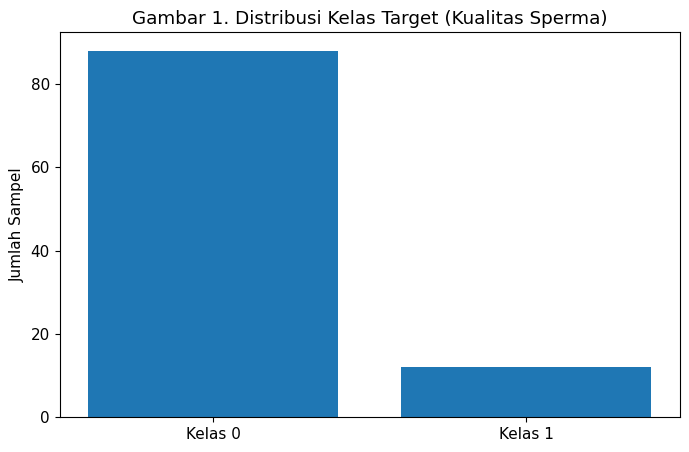

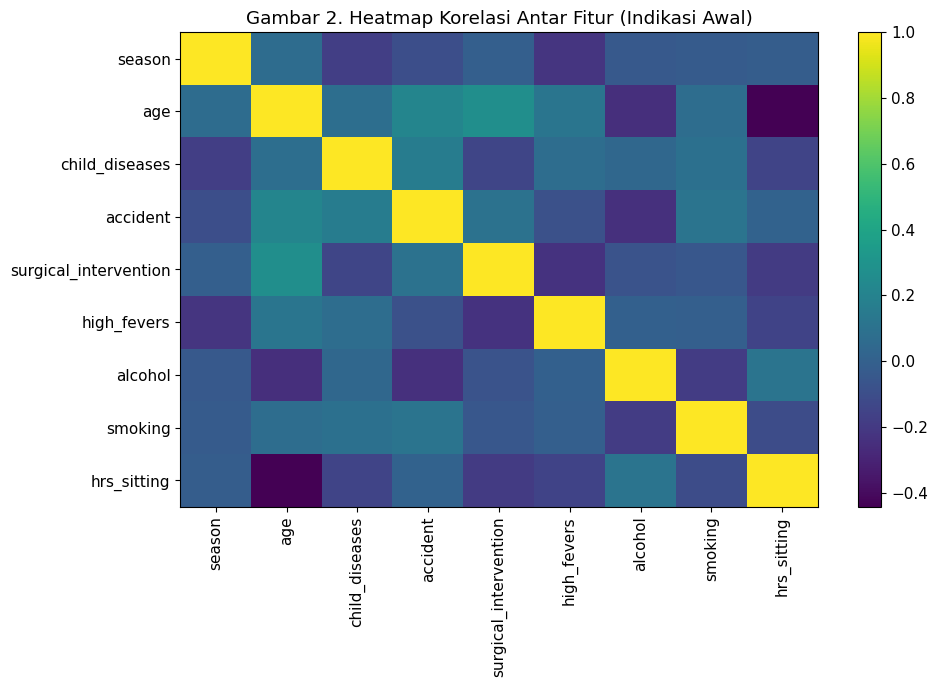

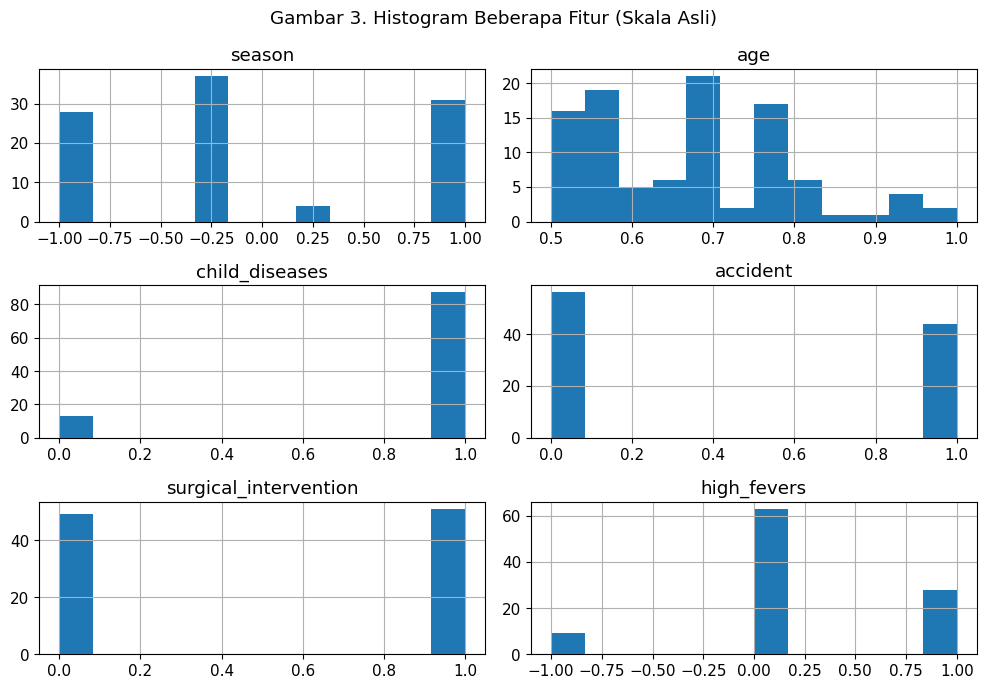


Train: (80, 9) | Test: (20, 9)
Distribusi y_train:


,jumlah
diagnosis,
0,70
1,10


Distribusi y_test:


,jumlah
diagnosis,
0,18
1,2



Baseline accuracy (most_frequent) on TEST: 0.9

Tabel Perbandingan Model (CV):


,Model,CV bal_acc (mean),CV bal_acc (std),CV F1 (mean),CV F1 (std),CV ROC-AUC (mean),CV ROC-AUC (std),CV PR-AUC (mean),CV PR-AUC (std)
0,LogReg_balanced,0.571429,0.074915,0.278889,0.111687,0.535714,0.067763,0.363956,0.179732
2,RandomForest_balanced,0.528571,0.113838,0.133333,0.266667,0.571429,0.142410,0.317733,0.148650
1,SVM_RBF_balanced,0.528571,0.111575,0.146667,0.180862,0.492857,0.176993,0.273527,0.176969


Model terpilih (berdasar CV bal_acc lalu ROC-AUC): LogReg_balanced

Classification Report (TEST):
              precision    recall  f1-score   support

     Kelas 0       0.92      0.61      0.73        18
     Kelas 1       0.12      0.50      0.20         2

    accuracy                           0.60        20
   macro avg       0.52      0.56      0.47        20
weighted avg       0.84      0.60      0.68        20



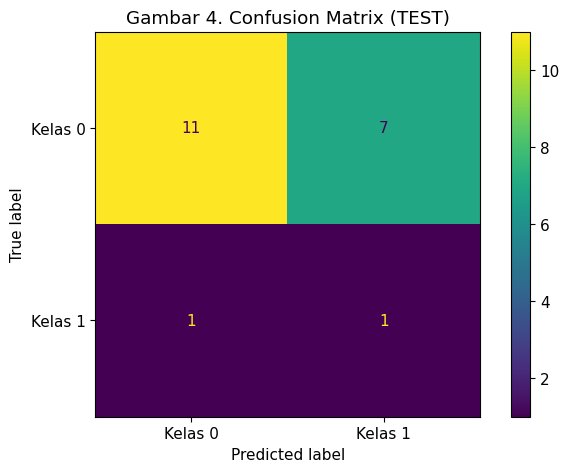


Diagnostik: Proporsi prediksi pada TEST (0..1):


,proporsi_prediksi
0,0.6
1,0.4


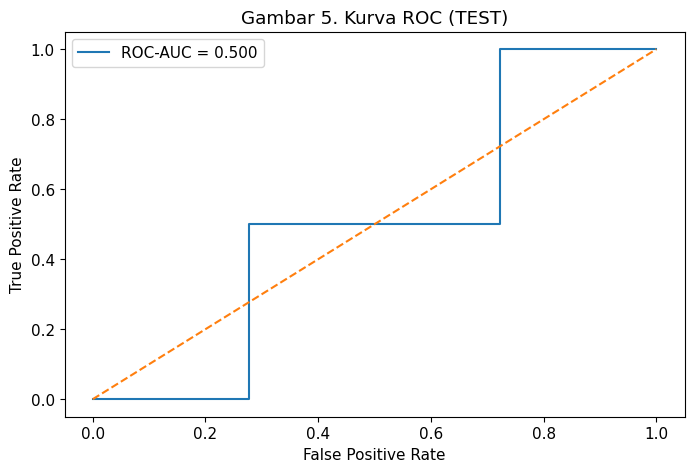

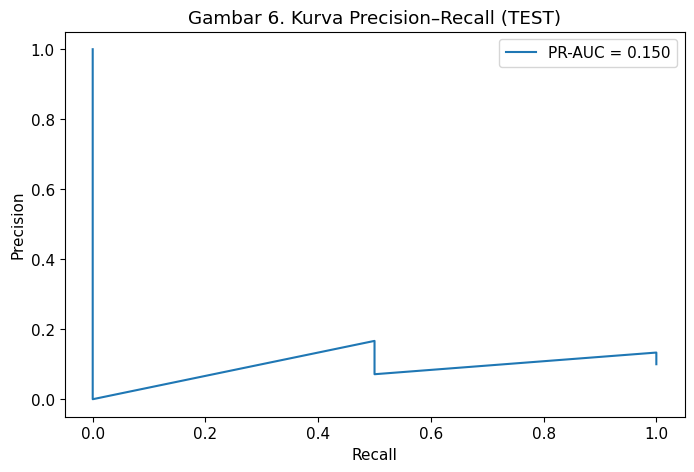


Top-10 fitur paling berpengaruh:


,feature,importance_mean,importance_std
7,smoking,0.028333,0.030777
6,alcohol,0.025000,0.042328
1,age,0.005000,0.063705
3,accident,-0.011667,0.044127
5,high_fevers,-0.016667,0.043461
0,season,-0.023333,0.082395
4,surgical_intervention,-0.030000,0.054160
2,child_diseases,-0.046667,0.054671
8,hrs_sitting,-0.063333,0.033993


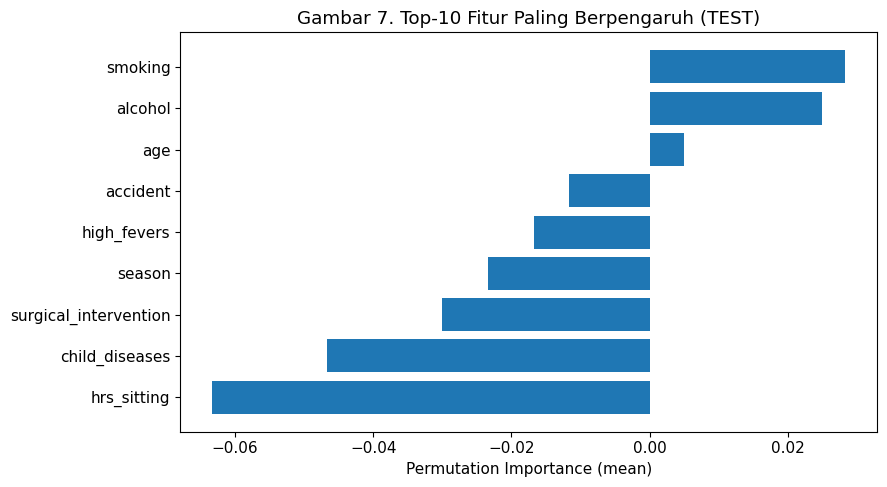


Ringkasan:


,Baseline acc (TEST),Best model (CV),TEST ROC-AUC,TEST PR-AUC,TEST CM,Catatan
0,0.9,LogReg_balanced,0.5,0.15,"[[11, 7], [1, 1]]",Data kecil -> fokus CV; precision bisa 0 jika ...


In [4]:
# ==========================================================
# Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Proyek : Analisis Kualitas Sperma & Kesehatan Reproduksi (UCI Fertility, ID=244)
# Fokus  : Pipeline yang aman dari data leakage + evaluasi stabil untuk data kecil/timpang
# Repo   : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingk. : Google Colab
# ==========================================================

# -------------------------
# 0) INSTALL & IMPORT
# -------------------------
!pip -q install -U ucimlrepo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

from sklearn.inspection import permutation_importance

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["font.size"] = 11


# -------------------------
# 1) AKUISISI DATA (UCI)
# -------------------------
fertility = fetch_ucirepo(id=244)
X = fertility.data.features.copy()
y = fertility.data.targets.copy()

print("Dataset:", fertility.metadata.get("name"))
print("X shape:", X.shape, "| y shape:", y.shape)
display(X.head())
display(y.head())


# -------------------------
# 2) AUDIT DATA & TARGET
# -------------------------
print("\nMissing per kolom:")
display(X.isna().sum().to_frame("missing"))

print("\nTipe data fitur:")
display(X.dtypes.to_frame("dtype"))

y_col = y.columns[0]
classes = sorted(y[y_col].unique().tolist())
print("\nLabel target ditemukan:", classes)

# target harus biner untuk pipeline ini
if len(classes) != 2:
    raise ValueError("Target bukan biner. Label ditemukan: " + str(classes))

# mapping robust: jika ada 'N' (normal) -> 0, selainnya -> 1
if "N" in classes:
    other = [c for c in classes if c != "N"][0]
    mapping = {"N": 0, other: 1}
else:
    mapping = {classes[0]: 0, classes[1]: 1}

y_bin = y[y_col].map(mapping).astype(int)
print("Mapping target:", mapping)

print("\nDistribusi target:")
display(y_bin.value_counts().to_frame("jumlah"))


# -------------------------
# 3) EDA RINGKAS (TABEL + VISUAL)
# -------------------------
display(X.describe().T)

# Gambar 1: Distribusi kelas
counts = y_bin.value_counts().sort_index()
plt.figure()
plt.bar(["Kelas 0", "Kelas 1"], counts.values)
plt.title("Gambar 1. Distribusi Kelas Target (Kualitas Sperma)")
plt.ylabel("Jumlah Sampel")
plt.show()

# Gambar 2: Heatmap korelasi (indikasi awal)
corr = X.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Gambar 2. Heatmap Korelasi Antar Fitur (Indikasi Awal)")
plt.tight_layout()
plt.show()

# Gambar 3: Histogram beberapa fitur (melihat skala & sebaran)
cols_to_plot = X.columns[:6]
X[cols_to_plot].hist(bins=12, figsize=(10, 7))
plt.suptitle("Gambar 3. Histogram Beberapa Fitur (Skala Asli)")
plt.tight_layout()
plt.show()


# -------------------------
# 4) SPLIT DATA (STRATIFIED)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)
print("\nTrain:", X_train.shape, "| Test:", X_test.shape)
print("Distribusi y_train:")
display(pd.Series(y_train).value_counts().to_frame("jumlah"))
print("Distribusi y_test:")
display(pd.Series(y_test).value_counts().to_frame("jumlah"))


# -------------------------
# 5) BASELINE
# -------------------------
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)
baseline_acc = baseline.score(X_test, y_test)
print("\nBaseline accuracy (most_frequent) on TEST:", round(baseline_acc, 4))


# -------------------------
# 6) MODEL (PIPELINE + CLASS_WEIGHT)
# -------------------------
# Catatan:
# - StandardScaler hanya untuk model sensitif skala (LR, SVM).
# - class_weight balanced untuk mengurangi bias kelas mayoritas.
models = {
    "LogReg_balanced": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced", random_state=42))
    ]),
    "SVM_RBF_balanced": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))
    ]),
    "RandomForest_balanced": Pipeline([
        ("clf", RandomForestClassifier(
            n_estimators=600, random_state=42, class_weight="balanced_subsample"
        ))
    ])
}


# -------------------------
# 7) VALIDASI SILANG (AMAN DARI WARNING) + TABEL
# -------------------------
# Perbaikan utama:
# - scoring precision/recall/f1 memakai make_scorer(zero_division=0)
# - tambahkan balanced_accuracy & avg_prec (PR-AUC)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "acc": "accuracy",
    "bal_acc": "balanced_accuracy",
    "f1": make_scorer(f1_score, zero_division=0),
    "prec": make_scorer(precision_score, zero_division=0),
    "rec": make_scorer(recall_score, zero_division=0),
    "roc_auc": "roc_auc",
    "avg_prec": "average_precision"
}

rows = []
for name, pipe in models.items():
    res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    rows.append({
        "Model": name,
        "CV bal_acc (mean)": res["test_bal_acc"].mean(),
        "CV bal_acc (std)":  res["test_bal_acc"].std(),
        "CV F1 (mean)":      res["test_f1"].mean(),
        "CV F1 (std)":       res["test_f1"].std(),
        "CV ROC-AUC (mean)": res["test_roc_auc"].mean(),
        "CV ROC-AUC (std)":  res["test_roc_auc"].std(),
        "CV PR-AUC (mean)":  res["test_avg_prec"].mean(),
        "CV PR-AUC (std)":   res["test_avg_prec"].std(),
    })

cv_table = pd.DataFrame(rows).sort_values(
    ["CV bal_acc (mean)", "CV ROC-AUC (mean)"], ascending=False
)
print("\nTabel Perbandingan Model (CV):")
display(cv_table)

best_name = cv_table.iloc[0]["Model"]
best_model = models[best_name]
print("Model terpilih (berdasar CV bal_acc lalu ROC-AUC):", best_name)


# -------------------------
# 8) TRAIN FINAL + EVALUASI TEST (LAPORAN TANPA WARNING)
# -------------------------
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification Report (TEST):")
print(classification_report(
    y_test, y_pred,
    target_names=["Kelas 0", "Kelas 1"],
    zero_division=0
))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Kelas 0", "Kelas 1"]).plot(values_format="d")
plt.title("Gambar 4. Confusion Matrix (TEST)")
plt.show()

# Diagnostik: apakah model memprediksi hanya 1 kelas?
pred_dist = pd.Series(y_pred).value_counts(normalize=True).sort_index()
print("\nDiagnostik: Proporsi prediksi pada TEST (0..1):")
display(pred_dist.to_frame("proporsi_prediksi"))

# Probabilitas/score untuk ROC & PR curve
clf_step = best_model.named_steps.get("clf", best_model)

if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test)[:, 1]
elif hasattr(clf_step, "predict_proba"):
    y_score = clf_step.predict_proba(X_test)[:, 1]
else:
    # fallback: decision_function jika ada
    y_raw = best_model.decision_function(X_test)
    y_score = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min() + 1e-9)

# ROC curve
auc = roc_auc_score(y_test, y_score)
fpr, tpr, _ = roc_curve(y_test, y_score)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC-AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gambar 5. Kurva ROC (TEST)")
plt.legend()
plt.show()

# PR curve (lebih peka untuk kelas minoritas)
ap = average_precision_score(y_test, y_score)
prec, rec, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(rec, prec, label=f"PR-AUC = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Gambar 6. Kurva Precision–Recall (TEST)")
plt.legend()
plt.show()


# -------------------------
# 9) INTERPRETASI: PERMUTATION IMPORTANCE
# -------------------------
# Catatan integritas:
# - pada data kecil, importance bisa berfluktuasi; tampilkan mean + std.
perm = permutation_importance(
    best_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1
)

imp = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

print("\nTop-10 fitur paling berpengaruh:")
display(imp.head(10))

plt.figure(figsize=(9, 5))
topk = 10
plt.barh(imp["feature"].head(topk)[::-1], imp["importance_mean"].head(topk)[::-1])
plt.xlabel("Permutation Importance (mean)")
plt.title("Gambar 7. Top-10 Fitur Paling Berpengaruh (TEST)")
plt.tight_layout()
plt.show()


# -------------------------
# 10) RINGKASAN AKHIR (TABEL)
# -------------------------
summary = pd.DataFrame([{
    "Baseline acc (TEST)": baseline_acc,
    "Best model (CV)": best_name,
    "TEST ROC-AUC": auc,
    "TEST PR-AUC": ap,
    "TEST CM": cm.tolist(),
    "Catatan": "Data kecil -> fokus CV; precision bisa 0 jika model tidak memprediksi kelas minoritas"
}])
print("\nRingkasan:")
display(summary)
